# SVO Gendered Subjects

In this notebook, we explore pronouns as subjects in sentences across the two subcorpora. We start with gendered third person pronouns and then examine the use of "I".

To be added: total percentage of pronouns appearing in SVOs in the two subcorpora. (Early calculations indicated pronouns -- `['i', 'we', 'she', 'he', 'they', 'it', 'you']` -- are the subjects of 70% of SVOs in both subcorpora. (Is this comparable to other forms of discourse?)

In [12]:
# IMPORTS
import pandas as pd
import numpy as np
import seaborn as sns
# import networkx as nx
# import plotly.graph_objects as go

After importing our libraries, we import our data. Here we are using the lemmatized SVOs from the **SVO Verbs Lemmatized** notebook. The output here confirms that we have 80,460 SVOs for the men's subcorpus and 26,610 for the women's.

In [3]:
# LOAD DATAFRAMES
# the `lem` suffix indicates the verbs have been lemmatized
svos_m = pd.read_csv("../output/svos_m_lem.csv", index_col=0)
svos_w = pd.read_csv("../output/svos_w_lem.csv", index_col=0)

print(svos_m.shape[0], svos_w.shape[0])

80460 26610


## Subjects

With the SVOs loaded, the first thing we do is to get a sense of the subjects involved, the **S** in SVO. 

The `compare` function takes a noun or pronoun and counts the number of times it appears as a subject. It then divides the count by the total number of SVOs for the particular subcorpus to give us a sense of the relative frequency.

The numbers are not altogether surprising: men and women use "he" with close to the same frequency (0.4% difference), but women use "she" more than twice as often as men, 2.4% versus 1.1%. In both cases, the gendered pronouns do not represent a fairly small subset of the overall SVOs.

The comparison of the gendered nouns man, men, woman, women turn up the slight tendency for men to use "man" and women to use "men", "woman", and "women" which causes us to wonder how "man" is being used in sentences: does it reflect a tendency to use man for human?

Much more interesting are the frequencies of first and second person pronouns, with men using "I" in one in five SVOs (19.2%) and women one in four (23.4%). Both use we with relatively the same frequency (19.2% for men and 17.5% for women) and men have a tendency to use you more frequently, 14.9% versus 11.7% by women.

In [3]:
def compare (subject):
    # Create name:
    m_tmp = svos_m[svos_m["subject"] == subject]
    w_tmp = svos_w[svos_w["subject"] == subject]
    print(f'''
    | ♂︎ | "{subject}" | {m_tmp.shape[0]} | {m_tmp.shape[0]/svos_m.shape[0]:.3f} |
    | ♀︎ | "{subject}" | {w_tmp.shape[0]} | {w_tmp.shape[0]/svos_w.shape[0]:.3f} |''')

### Third Person Perspective

In [4]:
thirdPerson = ['he', 'she', 'man', 'woman', 'men', 'women', 'actor', 'actress']

for i in thirdPerson:
    compare(i)


    | ♂︎ | "he" | 2548 | 0.032 |
    | ♀︎ | "he" | 757 | 0.028 |

    | ♂︎ | "she" | 848 | 0.011 |
    | ♀︎ | "she" | 643 | 0.024 |

    | ♂︎ | "man" | 80 | 0.001 |
    | ♀︎ | "man" | 13 | 0.000 |

    | ♂︎ | "woman" | 24 | 0.000 |
    | ♀︎ | "woman" | 35 | 0.001 |

    | ♂︎ | "men" | 40 | 0.000 |
    | ♀︎ | "men" | 23 | 0.001 |

    | ♂︎ | "women" | 37 | 0.000 |
    | ♀︎ | "women" | 62 | 0.002 |

    | ♂︎ | "actor" | 3 | 0.000 |
    | ♀︎ | "actor" | 1 | 0.000 |

    | ♂︎ | "actress" | 0 | 0.000 |
    | ♀︎ | "actress" | 0 | 0.000 |


### First & Second Person

In [5]:
firstSecond = ["i", "we", "you"]

for i in firstSecond:
    compare(i)


    | ♂︎ | "i" | 15440 | 0.192 |
    | ♀︎ | "i" | 6185 | 0.232 |

    | ♂︎ | "we" | 15458 | 0.192 |
    | ♀︎ | "we" | 4652 | 0.175 |

    | ♂︎ | "you" | 11949 | 0.149 |
    | ♀︎ | "you" | 3117 | 0.117 |


### Other Subjects

In [6]:
# This is just a placeholder for more interesting words
otherSubjects =  ['subject1', 'subject2']

for i in otherSubjects:
    compare(i)


    | ♂︎ | "subject1" | 0 | 0.000 |
    | ♀︎ | "subject1" | 0 | 0.000 |

    | ♂︎ | "subject2" | 0 | 0.000 |
    | ♀︎ | "subject2" | 0 | 0.000 |


## Verbs

Before delving into what verbs go with the pronouns above, it might be useful to establish an overall "verb landscape," exploring along the way possible differences between the two subcorpora. (It might also give us a baseline against which to compare what turns up when we focus on verbs associated with particular subjects.)

For this exploration of verbs we will first **group by** verb. (Later, we will want to group by pronouns and then by verb.) The `groupby` functionality will give us counts, and, if we want to doubele-check our math, we can sum the counts and check to see that they add up to the number of SVOs we have.

In [8]:
# Verbs in men's subcorpus
verbs_m = svos_m.groupby(
    ["verb"]).size().reset_index(name="count").sort_values(["count"], ascending=False)
print("Men speakers:\n", verbs_m.head(),"\n")

# Verbs in women's subcorpus
verbs_w = svos_w.groupby(
    ["verb"]).size().reset_index(name="count").sort_values(["count"], ascending=False)
print("Women speakers:\n", verbs_w.head())

Men speakers:
       verb  count
1078  have   8897
1024    go   3969
710     do   3815
1013   get   3065
2551  want   2830 

Women speakers:
       verb  count
736   have   2890
475     do   1085
695     go   1066
1644  want    895
691    get    795


In [9]:
verbs_m_total = verbs_m['count'].sum()
verbs_w_total = verbs_w['count'].sum()
print(verbs_m_total, verbs_w_total)

80460 26610


This block allows us to save these simple dataframes, which consist of one verb and its count per line:

In [10]:
# Commented out so we don't create files unless it's desired.
# verbs_m.to_csv("~/Desktop/verbs_m.csv")
# verbs_w.to_csv("~/Desktop/verbs_w.csv")

(2631, 2)

The total number of verbs for each subcorpus:

In [10]:
print(verbs_m.shape[0], verbs_w.shape[0])

2631 1687


In the case of the male speakers, there are a total of 2631 verbs used, with 959 of those verbs occurring only once. That leaves us with 1672 verbs that occur at least twice. For female speakers, there are 1687 verbs in total, with 692 used only once, leaving 995 to be used twice or more.

If we want to see those verbs with a particular count, we can create a cell with the following:

```python
TO DO
```

With the counts in place, we can establish relative frequencies as a new column by dividing the count of each verb by the total number of verbs. 

*In a hand inspection, I limited the relative frequency to the thousandth, and the result was that each subcorpus had only a little over 200 verbs that occur greater than 0.001 times: 216 for the male speakers and 225 for the female speakers. I'm not sure how/why it worked out that way. Is this a known phenonmenon in statistics/mathematics?*

In [11]:
verbs_w['freqency'] = verbs_w['count'] / verbs_w_total
verbs_m['freqency'] = verbs_m['count'] / verbs_m_total

In the cells that follow, we create a list of tuples from our dataframes that consist of only the verbs and the relative frequencies -- `[('verb1', rf1), 'verb2', rf2) ...]` so that we can then compare the relative frequencies. 

In [13]:
# We drop the count column and send the other two columns as a tuple to a list.
m_verbs = [tuple(r) for r in verbs_m.drop(['count'], axis=1).to_numpy().tolist()]

# A quick check
m_verbs[0][0]

'have'

In [14]:
# Sort the list and list the top 20 verbs
m_verbs_sorted = sorted(m_verbs, key=lambda x: x[1])
m_verbs_sorted[-20:]

[('call', 0.008985831469052945),
 ('like', 0.009843400447427294),
 ('find', 0.011546109868257519),
 ('say', 0.01257767834949043),
 ('put', 0.012826249067859806),
 ('try', 0.012950534427044495),
 ('know', 0.013385533184190902),
 ('give', 0.013435247327864778),
 ('tell', 0.013882674620929654),
 ('start', 0.017312950534427045),
 ('use', 0.018406661695252298),
 ('need', 0.019624658215262242),
 ('make', 0.02232165050956997),
 ('see', 0.026012925677355206),
 ('take', 0.026398210290827742),
 ('want', 0.035172756649266716),
 ('get', 0.03809346259010689),
 ('do', 0.04741486452895849),
 ('go', 0.049328859060402686),
 ('have', 0.11057668406661696)]

In [15]:
# Now for the womens' verbs
w_verbs = [tuple(r) for r in verbs_w.drop(['count'], axis=1).to_numpy().tolist()]

# Sort
w_verbs_sorted = sorted(w_verbs, key=lambda x: x[1])

# Display the top 20
w_verbs_sorted[-20:]

[('put', 0.009319804584742578),
 ('ask', 0.00947012401352875),
 ('like', 0.009733183013904547),
 ('try', 0.010973318301390455),
 ('give', 0.011574596016535137),
 ('say', 0.01416760616309658),
 ('find', 0.014205186020293123),
 ('know', 0.015482901164975573),
 ('start', 0.016459977452085682),
 ('tell', 0.017963171739947388),
 ('use', 0.018075911311537015),
 ('need', 0.0212326193160466),
 ('make', 0.022623074032318675),
 ('take', 0.02266065388951522),
 ('see', 0.02367531003382187),
 ('get', 0.02987598647125141),
 ('want', 0.03363397219090567),
 ('go', 0.04006012777151447),
 ('do', 0.04077414505824878),
 ('have', 0.10860578729800827)]

This function takes the lists of tuples above and subtracts the value of the verbs that match. If the women's list is first list and the men's list the second, then positive values will mean that verb is used more by women and negative values more by men. If we sort we should get the greatest divergence at either end of the list.

In [16]:
def match_and_subtract(list1, list2):
    # List1 and List2 are both lists of tuples of length 2. 
    # The first item in each tuple is a verb and the second is 
    # the fraction of all SVOs contain that verb
    result = {}
    
    # Loop over all the verbs in LIST1 and compare to each item in LIST2
    for item1 in list1:
        # Looping over the verbs list 2
        for item2 in list2:
            
            # If the verbs are the same, then do a comparison
            if item1[0] == item2[0]:
                # this IF/ELSE seems unnecessary... The commands are the same?
                result[item1[0]] = item1[1] - item2[1]
    return result

In [17]:
compare_verbs = match_and_subtract(m_verbs, w_verbs)

In [18]:
compare_verbs['tell']

-0.004080497119017734

In [47]:
m_verbs = [tuple(r) for r in verbs_m.drop(['count'], axis=1).to_numpy().tolist()]
w_verbs = [tuple(r) for r in verbs_w.drop(['count'], axis=1).to_numpy().tolist()]

compare_verbs = match_and_subtract(m_verbs, w_verbs)
compared_verb_list = list(compare_verbs.items())
compared_verbs_sorted = sorted(compared_verb_list, key=lambda x: x[1])

print("Used more by women:")
print(compared_verbs_sorted[0:10])
print("Used more by men:")
print(compared_verbs_sorted[-10:])

Used more by women:
[('tell', -0.004080497119017734), ('love', -0.003386390711133641), ('find', -0.0026590761520356044), ('know', -0.0020973679807846715), ('meet', -0.0016205717911187672), ('need', -0.001607961100784358), ('say', -0.0015899278136061509), ('hear', -0.0015586533015768127), ('share', -0.001465838620715553), ('play', -0.0014015661356445086)]
Used more by men:
[('give', 0.0018606513113296405), ('have', 0.0019708967686086903), ('try', 0.0019772161256540396), ('build', 0.0022252123570192925), ('see', 0.0023376156435333355), ('put', 0.0035064444831172277), ('take', 0.003737556401312521), ('do', 0.006640719470709711), ('get', 0.008217476118855479), ('go', 0.009268731288888214)]


In [50]:
compared_verb_list[:5]

[('have', 0.0019708967686086903),
 ('go', 0.009268731288888214),
 ('do', 0.006640719470709711),
 ('get', 0.008217476118855479),
 ('want', 0.001538784458361045)]

In [51]:
sorted(compared_verb_list[:5], key= lambda x: x[1])

[('want', 0.001538784458361045),
 ('have', 0.0019708967686086903),
 ('do', 0.006640719470709711),
 ('get', 0.008217476118855479),
 ('go', 0.009268731288888214)]

In [52]:
comp_vals = [x[1] for x in compared_verbs_sorted]

In [57]:
len(comp_vals)*.05

70.05

<AxesSubplot:ylabel='Count'>

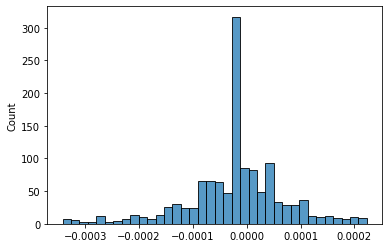

In [58]:
sns.histplot(data=comp_vals[70:-70])

<AxesSubplot:ylabel='Count'>

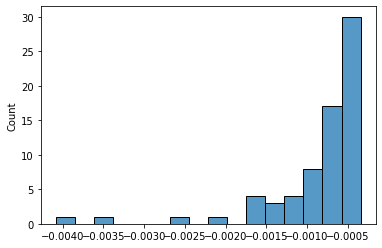

In [59]:
sns.histplot(data=comp_vals[:70])

<AxesSubplot:ylabel='Count'>

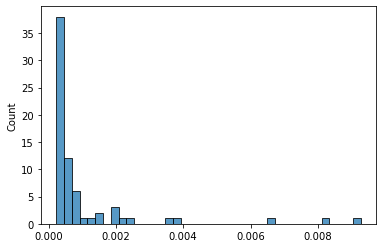

In [60]:
sns.histplot(data=comp_vals[-70:])

In [64]:
len(comp_vals) - (len(comp_vals[:70])+len(comp_vals[70:-70])+ len(comp_vals[-70:]))

0

<AxesSubplot:>

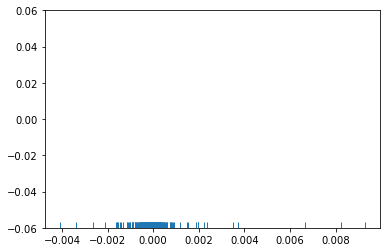

In [66]:
sns.rugplot(comp_vals)

In [41]:
print([x[0] for x in verbs_sorted[0:20]])

['tell', 'love', 'find', 'know', 'meet', 'need', 'say', 'hear', 'share', 'play', 'feel', 'ask', 'marry', 'spend', 'help', 'come', 'choose', 'think', 'stand', 'kill']


In [49]:
# Because of the way this list is ordered, 
# the most difference is at the end of this list.
# Reversed here to be more easily compared to list above.
print(list(reversed([x[0] for x in verbs_sorted[-20:]])))

['go', 'get', 'do', 'take', 'put', 'see', 'build', 'try', 'have', 'give', 'want', 'show', 'turn', 'develop', 'start', 'invent', 'design', 'solve', 'move', 'cost']


Code for various kinds of counts. 

In [ ]:
# Verbs that occur only once
# verbs_m_gt1 = verbs_m.loc[verbs_m["count"] == 1]
# verbs_w_gt1 = verbs_w.loc[verbs_w["count"] == 1]
# print(f"One-off verbs for ♂︎ - {verbs_m_gt1.shape[0]}; ♀︎ - {verbs_w_gt1.shape[0]}.")

# Verbs that occur more than twice
# verbs_m_gt2 = verbs_m.loc[verbs_m["count"] >= 2]
# verbs_w_gt2 = verbs_w.loc[verbs_w["count"] >= 2]
# print(f"Verbs that occur more than twice: for ♂︎ - {verbs_m_gt2.shape[0]}; ♀︎ - {verbs_w_gt2.shape[0]}.")

## Subjects with Verbs

In [21]:
# This gives us the top 20 verbs associated with "he" in the mens subcorpus
m_he = svos_m[svos_m["subject"] == "he"].groupby(["verb"]).size().reset_index(
    name='obs').sort_values(['obs'], ascending=False).iloc[:20]
m_he

,verb,obs
200,have,232
387,say,132
125,do,111
188,get,90
190,go,78
450,take,78
494,want,71
259,make,67
455,tell,58
336,put,54


Below is my attempt to create a function that would return an appropriately named dataframe which contained the top 20 verbs for a given subject. It was intended to be worked into a `for` loop:
```python
genderedSubjects = ['she', 'he', 'man', 'men', 'woman', 'women']
for i in genderedSubjects:
    verbCount(svos_w, "w", i, 30)
```
But it doesn't work as intended, creating a bunch of smaller dataframes, as a print statement reveals:
```python
print(w_man)
```
```
NameError: name 'w_man' is not defined
```

We can either run this code a dataframe at a time or go with something more pandas-y.

One approach might look like this:

In [ ]:
svos_m_pro = svos_m.loc[(
    svos_m['subject'] == 'he') | (
    svos_m['subject'] == 'she') | (
    svos_m["subject"] == "i")
]
svos_m_pro.shape

Another approach would take advantage of pandas `subset` functionality. Used on the entire mens subcorpus, it suggests that the most common subject-verb pairing is *we have*, by a pretty large margin, so let's mark that as something worth exploring further.

<div class="alert alert-block alert-warning"> <b>TO DO</b>: Take a look at "we have" in the mens subcorpus. </div>

In [ ]:
svos_m.value_counts(subset=['subject', 'verb'])

In [ ]:
# Create a list of the pronouns we want to see
pronouns = ["he", "she", "i"]

# Here's the code all in one block
m_pronouns = svos_m[svos_m["subject"].isin(
    pronouns)].value_counts(
    subset=['subject', 'verb']).reset_index()
m_pronouns.head()

In [ ]:
# svos_m_iheshe.to_csv("../output/m_iheshe.csv")

In [ ]:
m_pronouns.rename(columns={0:'v_count'}, inplace=True)
m_pronouns.head()

In [ ]:
m_pronouns.shape

In [ ]:
m_pronouns['v_freq'] = m_pronouns['v_count'] / m_pronouns['v_count'].sum()

In [ ]:
m_pronouns.head()

## Character Spaces as Verb-Feature Spaces

The goal in this section is to:

1. Collect all the verbs associated with the specified subjects
2. Weight the verbs (by normalization)
3. Compare the verbs manually
4. Visualize a comparison using PCA or t-SNE

First we explore the total number of verbs involved:

In [ ]:
# Collect all the verbs from the women's subcorpus
verbs_w = svos_w.groupby(["verb"]).size().reset_index(name='obs').sort_values(
        ['obs'], ascending=False)

# Select only the verbs that occur more than once
verbs_gt_w = verbs_w[verbs_w.obs > 2]

# What's our counts?
print(f"♀︎: {verbs_w.shape[0]} unique verbs; {verbs_gt_w.shape[0]} occur more than once")

In [ ]:
# Repeat for the men's subcorpus
verbs_m = svos_m.groupby(["verb"]).size().reset_index(name='obs').sort_values(
        ['obs'], ascending=False)
verbs_gt_m = verbs_m[verbs_m.obs > 2]

print(f"♂︎: {verbs_m.shape[0]} unique verbs; {verbs_gt_m.shape[0]} occur more than once")

Now we need to grab the verbs associated with the subjects:

In [ ]:
# Create a list of the subjects for which we want SVOs
subjects = ['she', 'he', 'i']

# Filter the dataframe
subjects_w = svos_w[svos_w['subject'].isin(subjects)]

# We don't want the objects for this
subjects_w = subjects_w.drop('object', axis=1)

# Count the unique combinations of two columns
subj_w_ct = subjects_w[['subject', 'verb']].value_counts().reset_index(name='count')

# Check our work
subj_w_ct.head()

In [ ]:
subj_w_ct.value_counts(subset=['subject', 'verb']).sort_index(ascending=False)

In [ ]:
# Repeat for the mens' subcorpus
subjects_m = svos_m[svos_m['subject'].isin(subjects)]
subjects_m = subjects_m.drop('object', axis=1)
subj_m_ct = subjects_m[['subject', 'verb']].value_counts().reset_index(name='count')
subj_m_ct.shape

In [ ]:
subj_m_ct.head(10)

In [ ]:
# See the total number of verbs above
# This could have been done with verbs_w.shape[0]
subj_m_ct['weight'] = subj_m_ct['count']/5307
subj_w_ct['weight'] = subj_w_ct['count']/3161

In [ ]:
subj_w_ct.head()

Now we have 2 dataframes, each with three subjects -- *she*, *he*, and *i*. Each subject has hundreds of verbs associated with it, and each verb has a weight normalized to its subcorpus so that it *should* be comparable to verbs in the other subcorpus. The goal is to see how close or far the six subjects are. 

In [ ]:
# Add our columns to attribute subject and verbs to a particular gender
subj_w_ct['speaker'] = "female"
subj_m_ct['speaker'] = "male"